# Scipy

## Interpolate

In [2]:
from scipy.interpolate import interp1d

In [3]:
import numpy as np
import matplotlib.pyplot as plt

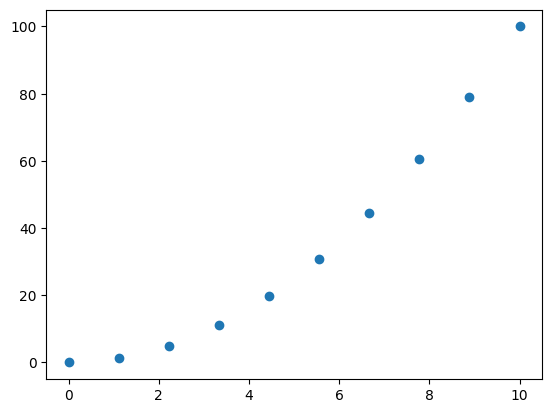

In [4]:
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

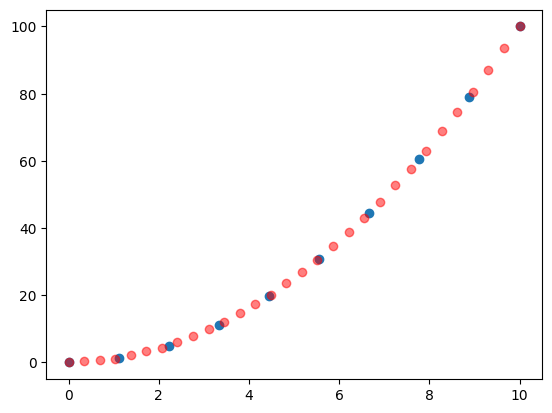

In [6]:
f = interp1d(x, y, kind="linear")

new_x = np.linspace(0, 10, 30)
result_interp = f(new_x)
plt.scatter(x, y)
plt.scatter(new_x, result_interp, c="r", alpha=0.5)

## Optimization

⚠️ do this in scikit learn

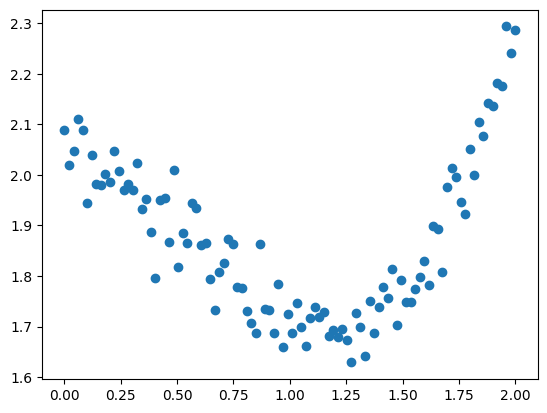

In [17]:
np.random.seed(0)
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [22]:
from scipy import optimize

def f (x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# curve_fit to find the f model with the mean root square error
params, param_cov = optimize.curve_fit(f, x, y)
print(f"params a, b, c, d: {params} \n\nparams covariance : {param_cov}")


params a, b, c, d: [ 0.33725982 -0.5470295  -0.1275568   2.05163087] 

params covariance : [[ 0.00091631 -0.00274894  0.00218812 -0.00035549]
 [-0.00274894  0.008487   -0.00704473  0.00122499]
 [ 0.00218812 -0.00704473  0.00625123 -0.00123125]
 [-0.00035549  0.00122499 -0.00123125  0.00033006]]


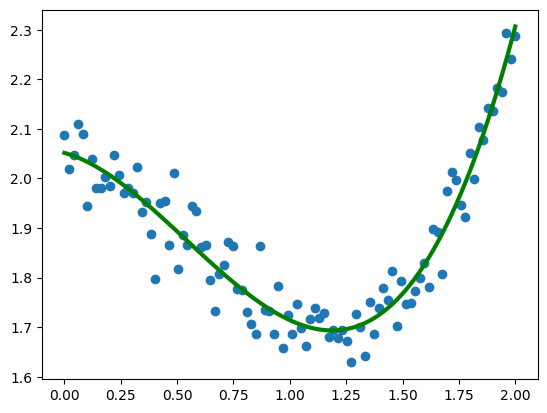

In [19]:
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

## Fourier (FFT)

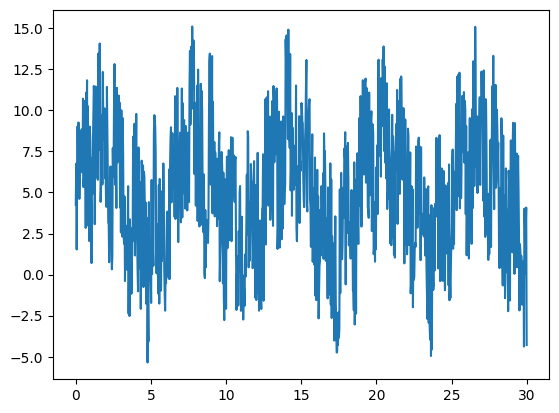

In [23]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

In [24]:
from scipy import fftpack

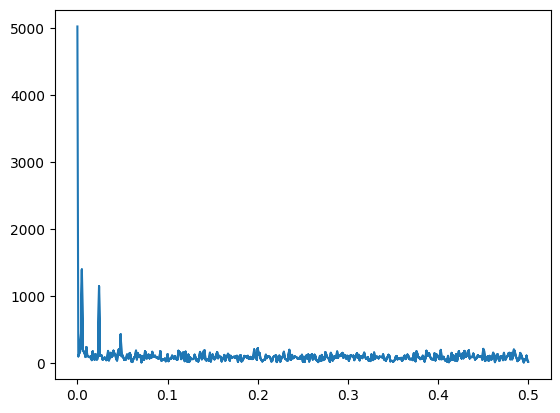

In [25]:
fourier = fftpack.fft(y)
power = np.abs(fourier) # power to remove negative
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

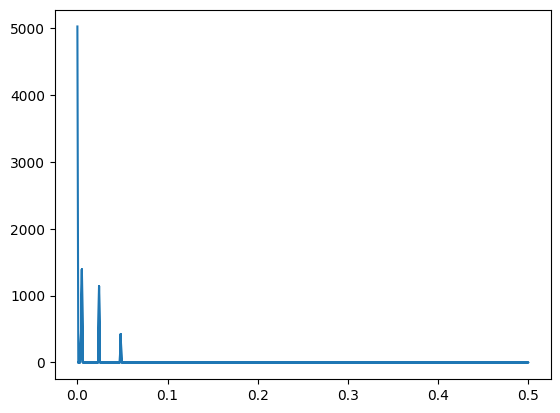

In [26]:
fourier[power<400] = 0 # to remove noise

plt.plot(np.abs(frequences), np.abs(fourier))

In [ ]:
# Inverse Fourier Transformation: to get new signal from the the filtered spectrum
filtered_signal = fftpack.ifft(fourier)

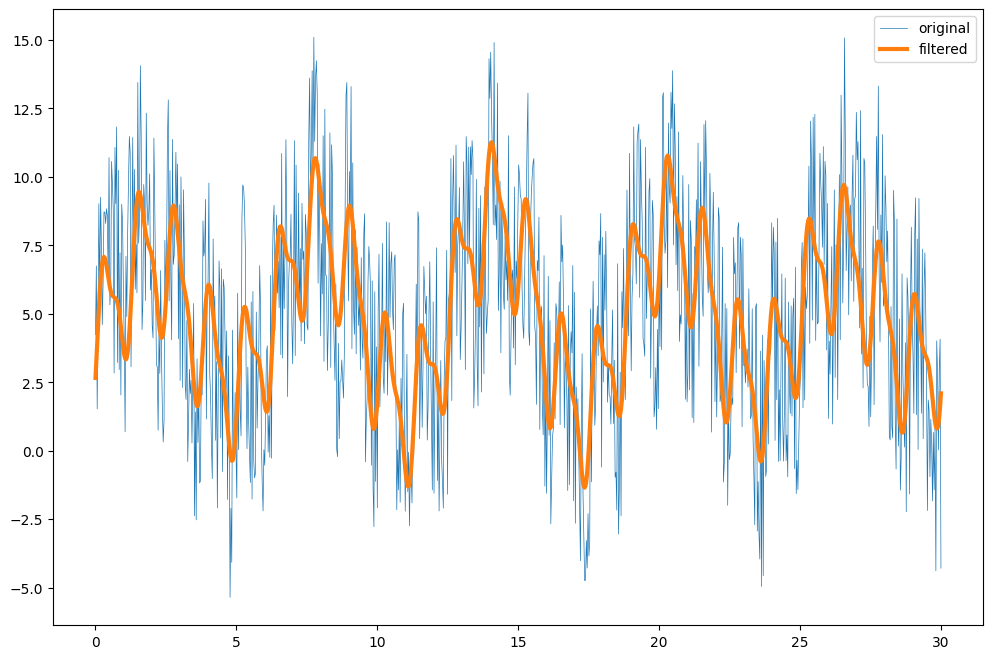

In [36]:

plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='original')
plt.plot(x, filtered_signal, lw=3, label="filtered")
plt.legend()